**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#Polynomial Linear Regression

In this project, you will perform a calculation of the coefficients used in a polynomial linear regression model for a given dataset.
Please reference the video lectures on Polynomial Linear Regression for a description of the algorithm and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  You will be turning in code and screenshots of your console output in an accompanying assignment.

- **Step 1**:  Upload the dataset file weatherDataP.csv file to your Google Drive.
Mount your drive and change to the folder.   
Note if get ERROR:root:Internal Python error in the inspect module error when trying to mount drive, restart runtime
- **Step 2**:   Create a Pandas table called 'weather' and read the dataset (weatherDataP.csv).  
Print out the first several rows.  
Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html  
Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html   
Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html  

- **Step 3**:  Read in the data feature independent variables (X), and the dependent variable Humidity (y) from your Pandas 'weather' table.  
- **Step 4**:  Examine the data (Humidity vs. Pressure) with Matplotlib. You will need to upload a screenshot of the plot in the accompanying assignment.
- **Step 5**:
 Create a function *def polyRegression(n):* that generates a polynomial regression model for the input dataset.   
Your function must input the degree of the fit function (n)  
Your function must return a tuple of the following outputs IN THIS ORDER:  
polynomial coefficients,  
polynomial intercept,  
r-squared score between y (dependent var from the dataset) and y_hat,
predicted output (y_hat)  
Note, y is your dependent variable from the dataset and y_hat is the predicted output.  
Note, make sure you return the coeffs, intercept, r-squared score, y_hat in this order!   
Record your polynomial equation for each of the degrees.  You will be required to  upload your equation in the accompanying assignment.  
Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html  
Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform  
Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit  
Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict  
Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html  
- **Step 6**:  Call your function from Step 4 for the degrees 1,2,3,4 and print out your results (coeffs, intercept, r2 score).  
Create a plot of the input dataset and the prediction line for each of the degrees (4 plots).  
Take a screenshot of your results and plots, you will upload them in the accompanying assignment.
- **Step 7**: Run the embedded doctest module.  
Record the output to confirm all your tests passed.

In [2]:
#Step 1
#Upload the dataset file weatherDataP.csv file to your Google Drive.
#Mount your drive and change to the folder. 
#Note if get ERROR:root:Internal Python error in the inspect module error when trying to mount drive, restart runtime

# Mount drive 
#from google.colab import drive
#drive.mount('/content/drive/', force_remount=True)
# cd (change directory) to the folder which contains the dataset
# YOUR CODE HERE...
#%cd /content/drive/MyDrive/your_folder_path/

In [16]:
#Note if get ERROR:root:Internal Python error in the inspect module error when trying to mount drive, restart runtime
#If restarted runtime, then execute previous cell!!
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


#Step 2
#Create a Pandas table called 'weather' and read the dataset (weatherDataP.csv)
#Print out the first several rows
#Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html 
#Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# YOUR CODE HERE...


# Read the dataset
weather = pd.read_csv('./weatherDataP.csv')

# Print the first several rows
print(weather.head())

# Print summary statistics
print(weather.describe())


   Pressure (millibars)  Humidity
0               1014.40      0.62
1               1014.20      0.66
2               1014.47      0.79
3               1014.45      0.82
4               1014.49      0.83
       Pressure (millibars)  Humidity
count             25.000000   25.0000
mean            1011.481600    0.5932
std                2.873799    0.1590
min             1007.260000    0.3600
25%             1008.360000    0.4600
50%             1012.220000    0.5900
75%             1014.240000    0.7200
max             1014.520000    0.8500


In [17]:
#Step 3:  Read in the data feature independent variables (X), and the dependent variable Humidity (y)
#         from your Pandas 'weather' table.
# YOUR CODE HERE...

X = weather['Pressure (millibars)'].values.reshape(-1, 1)  # Independent variable
y = weather['Humidity'].values  # Dependent variable



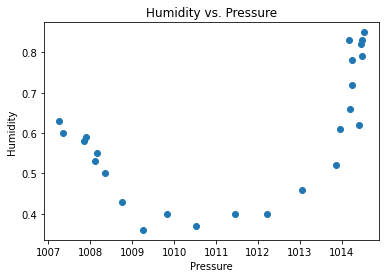

In [18]:
#Step 4:  Examine the data (Humidity vs. Pressure) with Matplotlib
#         You will need to upload a screenshot of the plot in the accompanying assignment.
# YOUR CODE HERE...

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('Pressure')
plt.ylabel('Humidity')
plt.title('Humidity vs. Pressure')
plt.show()



In [19]:
#Step 5:  Create a function that generates a polynomial regression model for the input dataset.
#         Your function must input the degree of the fit function (n)
#         Your function must return a tuple of the following outputs IN THIS ORDER:
#             polynomial coefficients, 
#             polynomial intercept, 
#             r-squared score between y (dependent var from the dataset) and y_hat,
#             predicted output (y_hat), 
#             Note, y is your dependent variable from the dataset and y_hat is the predicted output.
#         Note, make sure you return the coeffs, intercept, r-squared score, y_hat in this order!
#         Record your polynomial equation for each of the degrees.  You will be required to 
#             upload your equation in the accompanying assignment.
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
def polyRegression(n):
# YOUR CODE HERE...
# Create polynomial features
    poly_features = PolynomialFeatures(degree=n)
    X_poly = poly_features.fit_transform(X)

    # Perform linear regression
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict the output
    y_pred = model.predict(X_poly)

    # Calculate R-squared score
    r2 = r2_score(y, y_pred)

    return model.coef_, model.intercept_, r2, y_pred




In [27]:
#Step 6:  Call your function from Step 4 for the degrees 1,2,3,4 and print out your results (coeffs, intercept, r2 score).
#         Also create a plot of the input dataset and the prediction line for each of the degrees (4 plots)
#         Take a screenshot of your results and plots, you will upload them in the accompanying assignment.
# YOUR CODE HERE...

degree_1 = polyRegression(1)
degree_2 = polyRegression(2)
degree_3 = polyRegression(3)
degree_4 = polyRegression(4)

# Print the results
print('Degree 1 Coeffs:', degree_1[0])
print('Degree 1 Intercept:', degree_1[1])
print('Degree 1 Score:', degree_1[2])
print()

print('Degree 2 Coeffs:', degree_2[0])
print('Degree 2 Intercept:', degree_2[1])
print('Degree 2 Score:', degree_2[2])
print()

print('Degree 3 Coeffs:', degree_3[0])
print('Degree 3 Intercept:', degree_3[1])
print('Degree 3 Score:', degree_3[2])
print()

print('Degree 4 Coeffs:', degree_4[0])
print('Degree 4 Intercept:', degree_4[1])
print('Degree 4 Score:', degree_4[2])
print()
 

Degree 1 Coeffs: [0.         0.03057561]
Degree 1 Intercept: -30.333470210706807
Degree 1 Score: 0.3053999552048746

Degree 2 Coeffs: [ 0.00000000e+00 -5.77225454e+01  2.85583573e-02]
Degree 2 Intercept: 29167.746043604795
Degree 2 Score: 0.8616233381720982

Degree 3 Coeffs: [ 0.00000000e+00  8.12324588e+03 -8.06389419e+00  2.66828921e-03]
Degree 3 Intercept: -2727640.538321711
Degree 3 Score: 0.8777508328123192

Degree 4 Coeffs: [ 0.00000000e+00  5.87846777e-03  3.99351567e+00 -5.28588734e-03
  1.96773530e-06]
Degree 4 Intercept: -675369.133122779
Degree 4 Score: 0.8777798578447106



IndexError: list index out of range

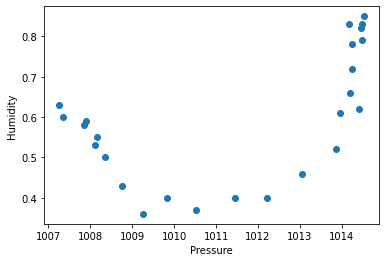

In [24]:
plt.scatter(X, y, label='Actual data')
plt.xlabel('Pressure')
plt.ylabel('Humidity')

# Plot the prediction line for each degree
plt.plot(X, degree_1[3], color='red', label='Degree 1')
plt.plot(X, degree_2[3], color='green', label='Degree 2')
plt.plot(X, degree_3[3], color='blue', label='Degree 3')
plt.plot(X, degree_4[3], color='orange', label='Degree 4')

plt.legend()
plt.title('Humidity vs. Pressure with Polynomial Regression')
plt.show()


In [31]:
#Step 7:  Run the following doctest module.
#         Note, do not modify any of the code below this line.
#         Record the output to confirm all your tests passed.
import doctest
polyRegDegree2 = polyRegression(2)
polyRegDegree3 = polyRegression(3)
"""
  >>> print('Degree 2 Coeffs:', polyRegDegree2[0])
  Degree 2 Coeffs: [ 0.00000000e+00 -5.77225454e+01  2.85583573e-02]
  >>> print('Degree 2 Intercept:', polyRegDegree2[1])
  Degree 2 Intercept: [29167.74604361]
  >>> print('Degree 2 Score:', polyRegDegree2[2])
  Degree 2 Score: 0.8616233381649783
  >>> print('Degree 3 Coeffs:', polyRegDegree3[0])
  Degree 3 Coeffs: [ 0.00000000e+00  8.12324588e+03 -8.06389419e+00  2.66828921e-03]
  >>> print('Degree 3 Intercept:', polyRegDegree3[1])
  Degree 3 Intercept: [-2727640.53926199]
  >>> print('Degree 3 Score:', polyRegDegree3[2])
  Degree 3 Score: 0.8777508325098228
"""

doctest.testmod()


**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print('Degree 2 Intercept:', polyRegDegree2[1])
Expected:
    Degree 2 Intercept: [29167.74604361]
Got:
    Degree 2 Intercept: 29167.746043604795
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print('Degree 2 Score:', polyRegDegree2[2])
Expected:
    Degree 2 Score: 0.8616233381649783
Got:
    Degree 2 Score: 0.8616233381720982
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print('Degree 3 Intercept:', polyRegDegree3[1])
Expected:
    Degree 3 Intercept: [-2727640.53926199]
Got:
    Degree 3 Intercept: -2727640.538321711
**********************************************************************
File "__main__", line 13, in __main__
Failed example:
    print('Degree 3 Score:', polyRegDegree3[2])
Expected

TestResults(failed=4, attempted=6)